# Fields

Fields allow you to define an area where certain Scene Elements will appear randomly
This can be interesting in foraging scenario, where an agents move around to collect rewards.

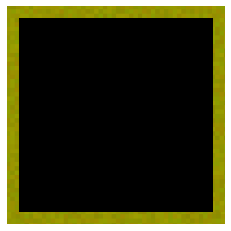

In [2]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine

%matplotlib inline
import matplotlib.pyplot as plt


def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
my_playground = SingleRoom(size=(200, 200))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode = True))

Now that we have an empty playground, lets create a field that produces candies in the top-left area of the playground.

In [3]:
from simple_playgrounds.playgrounds.scene_elements import Candy, Field
from simple_playgrounds.utils import PositionAreaSampler


area = PositionAreaSampler( center = (50, 150), area_shape='circle', radius= 30 )
field = Field(probability=0.1, limit=10, entity_produced=Candy, production_area=area)
my_playground.add_scene_element(field)

Now we can let the playground run for some time, and see if the field produces candies.

Run the following cell multiplt times.

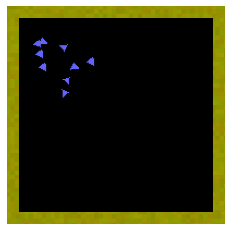

In [12]:
engine.run(steps = 10)

plt_image(engine.generate_playground_image(plt_mode = True))

In [13]:
engine.terminate()

Finally, we can add an agent controlled by a keyboard.
We see that the Candies are replaced little by little.

In [19]:
from simple_playgrounds.agents.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent
from simple_playgrounds.agents.parts.platform import ForwardPlatform

from simple_playgrounds.playgrounds.scene_elements import Candy, Field
from simple_playgrounds.utils import PositionAreaSampler


my_playground = SingleRoom(size=(200, 200))
engine = Engine(time_limit=10000, playground= my_playground, screen=True)

area = PositionAreaSampler( center = (100, 100), area_shape='circle', radius= 100 )
field = Field(probability=0.1, limit=10, entity_produced=Candy, production_area=area)
my_playground.add_scene_element(field)

my_agent = BaseAgent(controller=Keyboard(), platform = ForwardPlatform, interactive = True)
my_playground.add_agent(my_agent)


engine.run(update_screen=True)
engine.terminate()

You probably noticed that the field stops producing after some time.
There is a total limit of total produced entities that can be set.